In [89]:
import matplotlib.pyplot as plt
import pvdeg
from pvlib import spectrum, solarposition, irradiance, atmosphere
import pandas as pd
import os

## Accelerated Stress Testing

The following procedures are defined in IEC 61215-2 - *"Terrestrial photovoltaic (PV) modules – Design qualification and type approval, Part 2: Test procedures"*.

WARNING: This material is copyrighted and we may not be able to share it publicly as it is paywalled by IEC.

**UV Preconditioning Test (MQT 10)**

The following UV preconditoning test (MQT 10) specified in IEC-61215. The test requires irradiance between 280 nm and 400 nm does not exceed 250 $\frac{w}{m^2}$. Significantly, we need to accumulate 15 $\frac{kWh}{m^2}$ over the duration of the test.  

If we set the irradiance to 250 $\frac{w}{m^2}$ it will take 60 hours to reach 15 $\frac{kWh}{m^2}$. Our setpoints file will contain one row with a 3600 minute long timestep.

In [90]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-10.csv")

mqt_10 = pvdeg.Chamber(fp=path, setpoint_names=["temperature", "irradiance_280-400"], skiprows=[1])

,setpoint_temperature,setpoint_irradiance_280-400
0 days 00:00:00,60.0,250.0
0 days 00:01:00,60.0,250.0
0 days 00:02:00,60.0,250.0
0 days 00:03:00,60.0,250.0
0 days 00:04:00,60.0,250.0
...,...,...
2 days 11:55:00,60.0,250.0
2 days 11:56:00,60.0,250.0
2 days 11:57:00,60.0,250.0
2 days 11:58:00,60.0,250.0

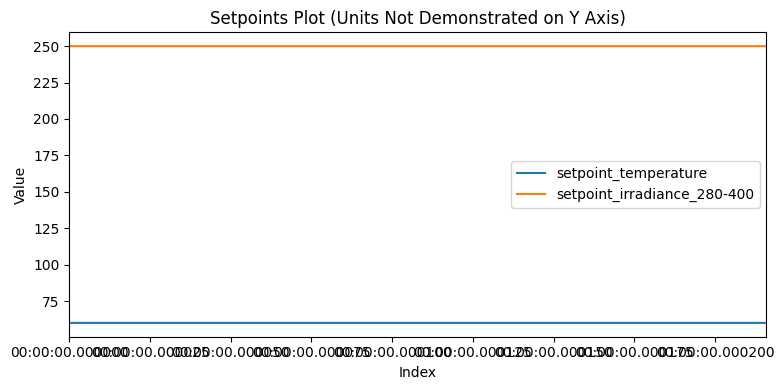

In [91]:
mqt_10

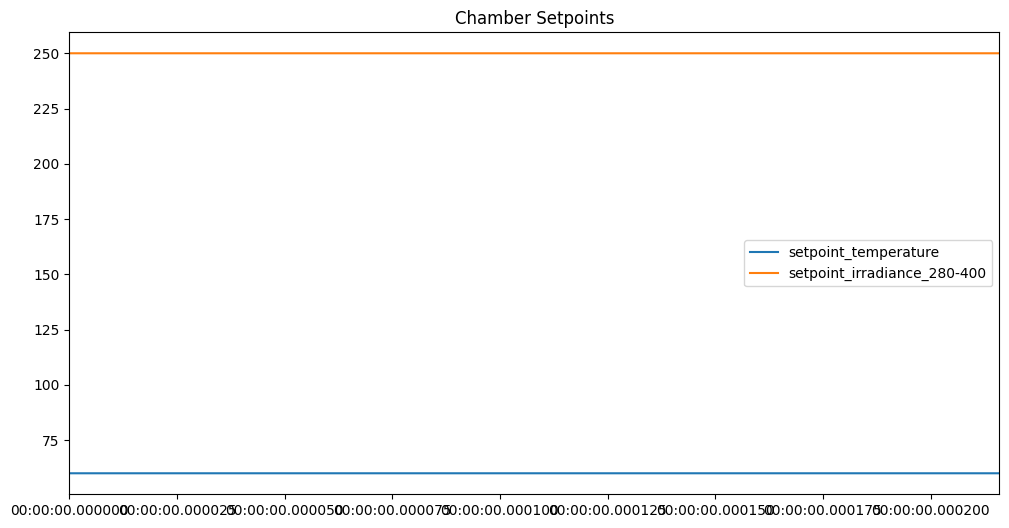

In [92]:
mqt_10.plot_setpoints()

**Thermal Cycling Test (MQT 11)**

This test uses the thermal and voltage cycling test specified in IEC-61215. Currently, voltage is not used for any of the chamber test calculations by pvdeg. It is just included in the csv for the sake of completeness. 

In [93]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-11.csv")

mqt_11 = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature","voltage"],
    skiprows=[1],
)

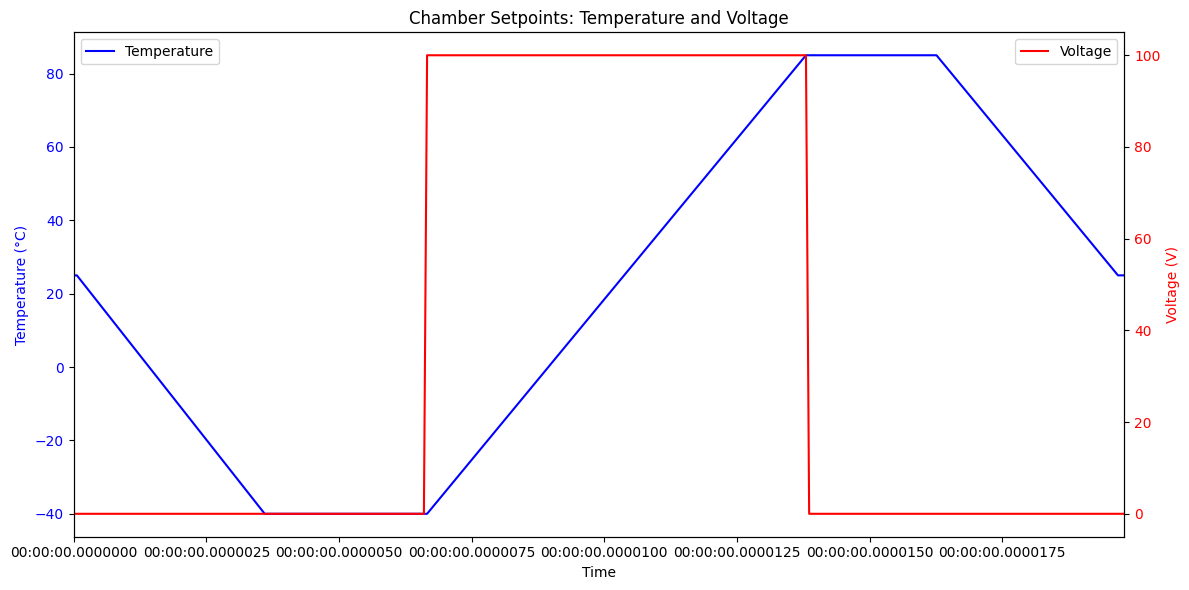

In [94]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary axis
mqt_11.setpoints["setpoint_temperature"].plot(ax=ax1, color="blue", label="Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")

# Create a twin axis for voltage
ax2 = ax1.twinx()
mqt_11.setpoints["setpoint_voltage"].plot(ax=ax2, color="red", label="Voltage")
ax2.set_ylabel("Voltage (V)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right")

plt.title("Chamber Setpoints: Temperature and Voltage")
plt.tight_layout()
plt.show()

**Humidity Freeze Cycle (MQT 12)**

In [95]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-12.csv")

mqt_13 = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1]
)

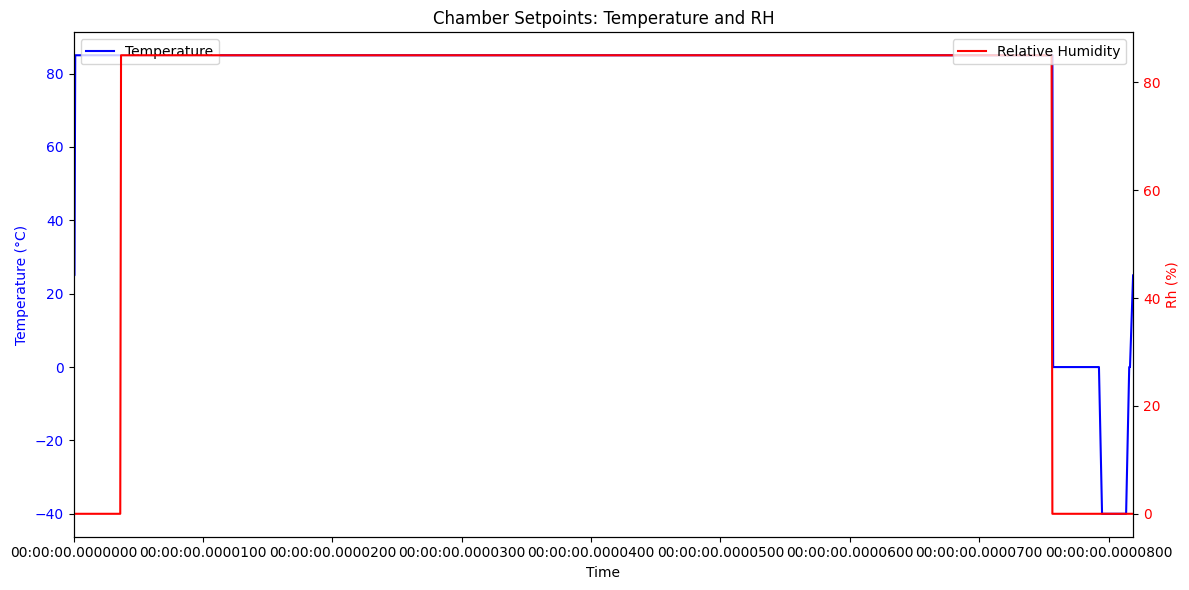

In [96]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary axis
mqt_13.setpoints["setpoint_temperature"].plot(ax=ax1, color="blue", label="Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")

# Create a twin axis for voltage
ax2 = ax1.twinx()
mqt_13.setpoints["setpoint_relative_humidity"].plot(ax=ax2, color="red", label="Relative Humidity")
ax2.set_ylabel("Rh (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right")

plt.title("Chamber Setpoints: Temperature and RH")
plt.tight_layout()
plt.show()

**Damp Heat Test (MQT 13)**

This test is defined in IEC-61215. It is an $85 \degree C$, 85% relative humidity test for 1000 hours.

In [97]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-13.csv")

mqt_13 = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1]
)

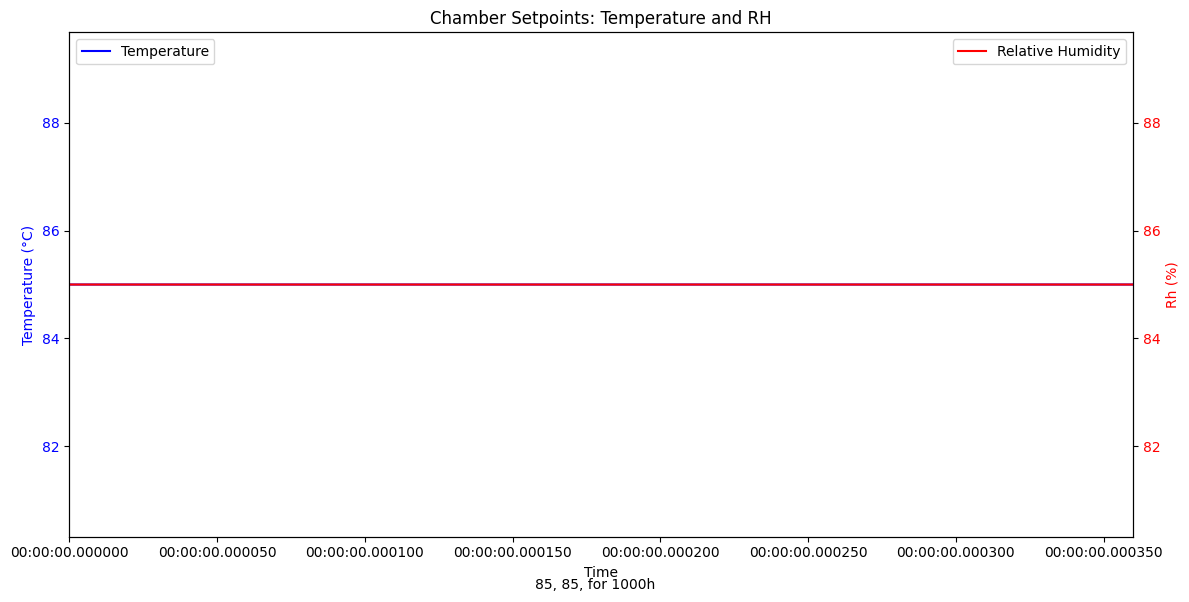

In [98]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary axis
mqt_13.setpoints["setpoint_temperature"].plot(ax=ax1, color="blue", label="Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")

# Create a twin axis for voltage
ax2 = ax1.twinx()
mqt_13.setpoints["setpoint_relative_humidity"].plot(ax=ax2, color="red", label="Relative Humidity")
ax2.set_ylabel("Rh (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right")

plt.title("Chamber Setpoints: Temperature and RH")
plt.figtext(0.45, 0.01, "85, 85, for 1000h")
plt.tight_layout()
plt.show()

## DH+UV - IEC 63556

200 W/m2, UV40 kWh/m2  
IEC61215-2, DH200h, 85℃/85%RH, 200h  (MQT13 twice for 2000 hours total)

UV irradiation of 200W/m2 applied during 85℃  

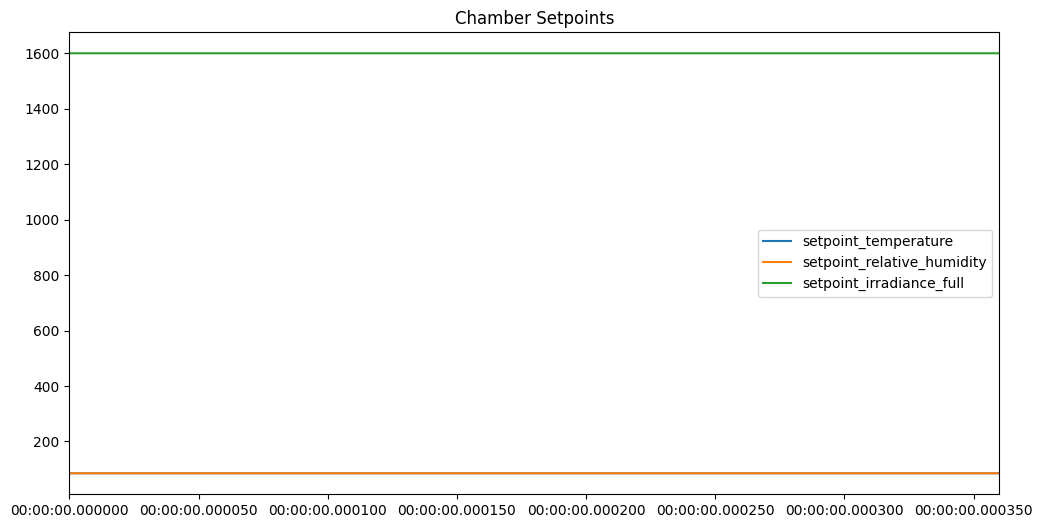

In [99]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-13.csv")

dh_uv = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1],
)

# apply irradiance at 85 C
dh_uv.setpoints["setpoint_irradiance_full"] = dh_uv.setpoints["setpoint_temperature"].apply(lambda x: 1600 if x == 85 else 0)

dh_uv.plot_setpoints()

## TC+UV - IEC 63556

200 W/m2, UV40 kWh/m2  
IEC61215-2, DH200h, 85℃/85%RH, 200h  (MQT13 twice for 2000 hours total)

this is full spectrum, not uv, this is a stand in and partially representative of the 200 W/m^2 on 280-400 nm. 

In [100]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-11.csv")

tc_uv = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature"],
    skiprows=[1],
)

tc_uv.setpoints["setpoint_irradiance_full"] = tc_uv .setpoints["setpoint_temperature"].apply(lambda x: 1600 if x > 0 else 0)
# processing.setpoints["setpoint_relative_humidity"] = 0.3

,setpoint_temperature,setpoint_irradiance_full
0 days 00:00:00,25.0,1600
0 days 00:01:00,25.0,1600
0 days 00:02:00,23.898305,1600
0 days 00:03:00,22.79661,1600
0 days 00:04:00,21.694915,1600
...,...,...
0 days 05:26:00,27.105263,1600
0 days 05:27:00,26.052632,1600
0 days 05:28:00,25.0,1600
0 days 05:29:00,25.0,1600

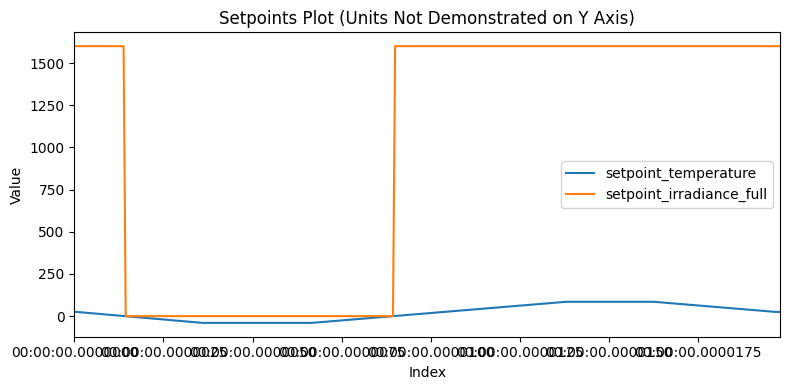

In [101]:
tc_uv

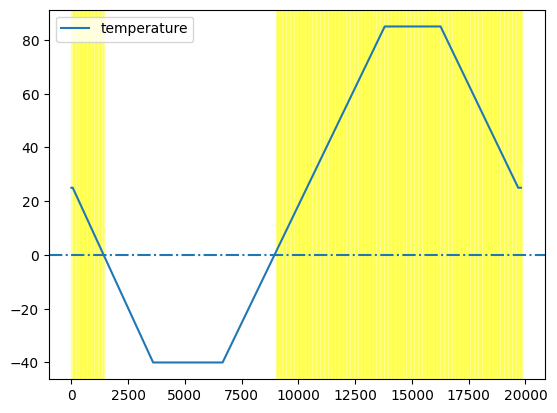

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# irradiance = processing.setpoints["setpoint_irradiance_full"]
temperature = tc_uv.setpoints["setpoint_temperature"]

# ax.plot(irradiance, label="full spectrum irradiance")
ax.plot(temperature, label="temperature")

ax.axhline(y = 0, linestyle="-.")
for idx, value in tc_uv.setpoints["setpoint_irradiance_full"].items():
    if value > 200:
        ax.axvspan(idx.total_seconds(), idx.total_seconds() + 60, color='yellow', alpha=0.3)

plt.legend()

## HF+UV - IEC 63556

200 W/m2, UV40 kWh/m2 (we will approximate by using 1600 w/m^2 full spectrum for now)  
IEC61215-2, TC50 (MQT 12)  

UV irradiation of 200W/m2 applied above 0℃ 

In [103]:
path = os.path.join(pvdeg.CHAMBER_DIR, "IEC-61215-MQT-12.csv")

hf_uv = pvdeg.Chamber(
    fp=path,
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1],
)

# apply irradiance when temperature above 0 C
hf_uv.setpoints["setpoint_irradiance_full"] = hf_uv.setpoints["setpoint_temperature"].apply(lambda x: 1600 if x > 0 else 0)

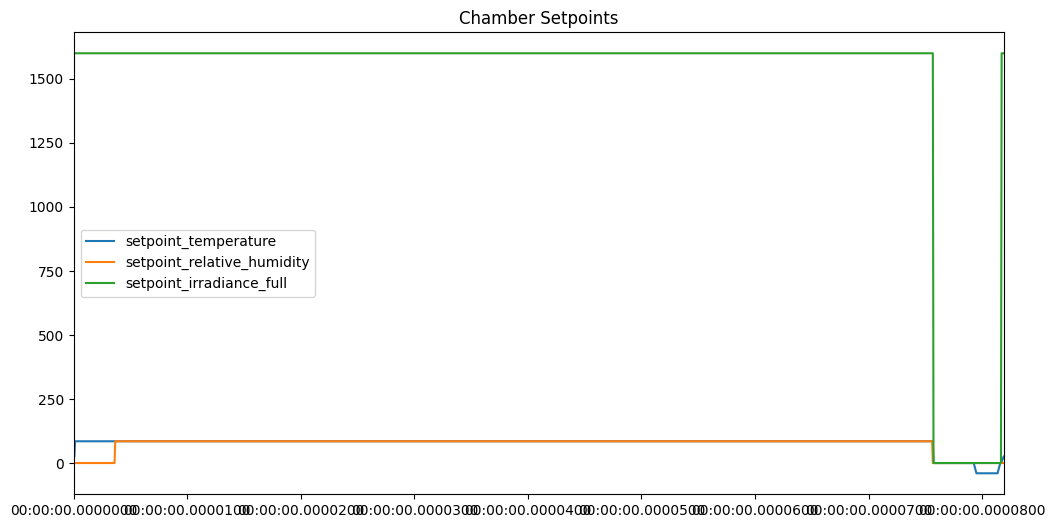

In [104]:
hf_uv.plot_setpoints()

IEC 63556 - Standard test sequence

![63556](63556.png)

In [105]:
a = pd.concat([dh_uv.setpoints] * 2) # this is only 100 hours by default
b = pd.concat([tc_uv.setpoints] * 50) # 50 cycles TC + UV
c = pd.concat([hf_uv.setpoints] * 10) # 10 cycles HF + UV

repeat_twice = pd.concat([b, c] * 2) # repeat two times

# combine all
iec_63556 = pd.concat( 
    [a, repeat_twice]
)

# reset index
iec_63556.index = pd.timedelta_range(start="0 days", periods=len(iec_63556), freq="min")


### CALCULATION DOES NOT WORK IF RH IS 0, gives NaN dew point
### realistically, RH will neverbe 0, should we approximate with a very low RH, ex. 0.1
### or should we use a normal indoor rh like 30 or 40
### the test sequences never specify 0 RH, only that there is no active RH control
### does this mean we can use a default in these cases
iec_63556["setpoint_relative_humidity"] = iec_63556["setpoint_relative_humidity"].apply(lambda x : 30 if x == 0 else x)

iec_63556

,setpoint_temperature,setpoint_relative_humidity,setpoint_irradiance_full
0 days 00:00:00,85.0,85.0,1600
0 days 00:01:00,85.0,85.0,1600
0 days 00:02:00,85.0,85.0,1600
0 days 00:03:00,85.0,85.0,1600
0 days 00:04:00,85.0,85.0,1600
...,...,...,...
50 days 06:55:00,0.0,30.0,0
50 days 06:56:00,6.25,30.0,1600
50 days 06:57:00,12.5,30.0,1600
50 days 06:58:00,18.75,30.0,1600


<Axes: title={'center': 'rh setpoints : contain nans'}>

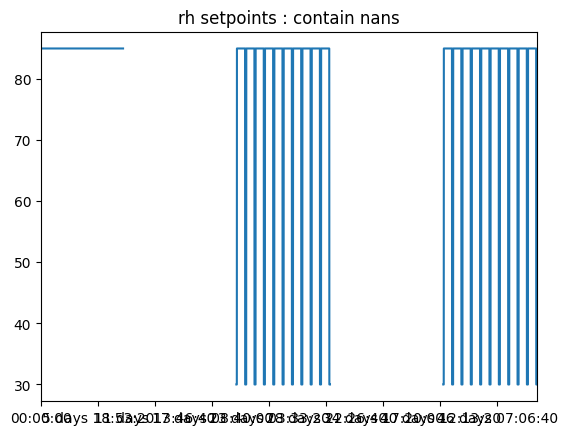

In [106]:
# we must fix the nans
iec_63556["setpoint_relative_humidity"].plot(title="rh setpoints : contain nans")

<Axes: title={'center': 'rh setpoints : nans fixed'}>

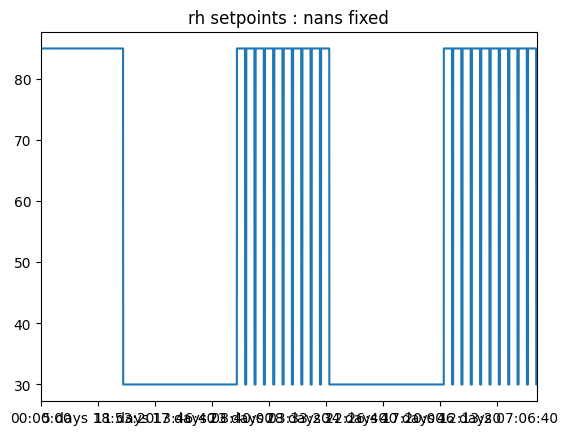

In [107]:
# must fix the nans so they do not propigate through our simulation
# lets use a placeholder value of rh = 30 %
# iec_63556["setpoint_relative_humidity"] = iec_63556["setpoint_relative_humidity"].apply(lambda x: 30 if pd.isna(x) else x) 
iec_63556["setpoint_relative_humidity"] = iec_63556["setpoint_relative_humidity"].map(lambda x: 30 if pd.isna(x) else x) # map is faster and only works on pd.Series

iec_63556["setpoint_relative_humidity"].plot(title="rh setpoints : nans fixed")

In [108]:
# define chamber with created setpoints df instead of providing file containing setpoints
chamber_63556 = pvdeg.Chamber(setpoints=iec_63556)

# use water parameters
# add test sample parameters
chamber_63556.setEncapsulant("H2Opermeation", key="W001", thickness=0.5)   # eva
chamber_63556.setBacksheet("H2Opermeation", key="W003", thickness=0.25)    # pet

chamber_63556.setDimensions(0.1, 0.1)
chamber_63556.setAbsorptance(0.98)

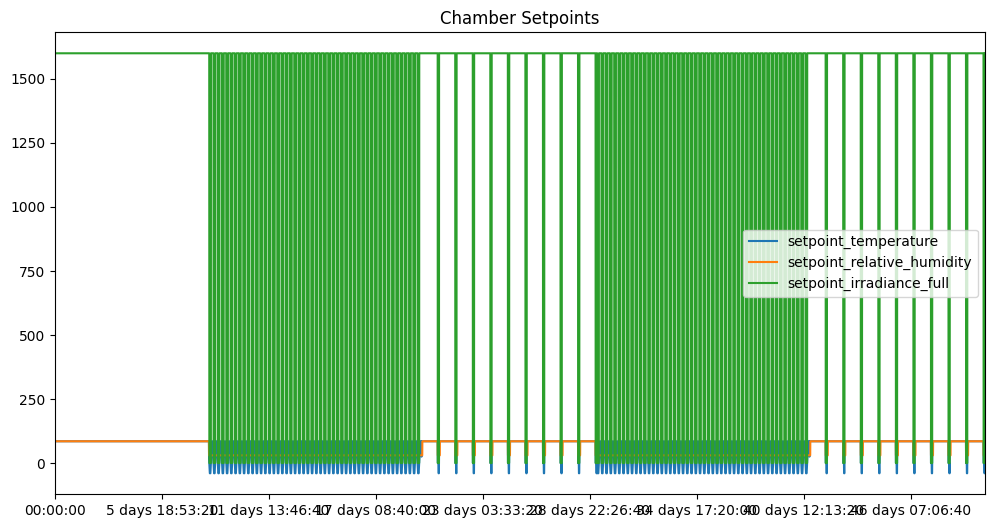

In [109]:
chamber_63556.plot_setpoints()

In [110]:
chamber_63556.calc_temperatures(
    air_temp_0=chamber_63556.setpoints["setpoint_temperature"].iloc[0],
    sample_temp_0=chamber_63556.setpoints["setpoint_temperature"].iloc[0],
    tau_c=15,
    tau_s=10
)

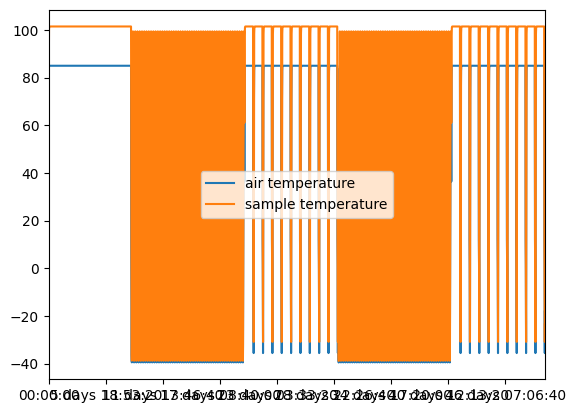

In [111]:
chamber_63556.plot_temperatures()

In [112]:
chamber_63556.chamber_conditions(
    tau_c=15, 
    air_temp_0=chamber_63556.setpoints["setpoint_temperature"].iloc[0]
)

,setpoint_temperature,setpoint_relative_humidity,setpoint_irradiance_full,Air Temperature,Water Vapor Pressure,Dew Point
0 days 00:00:00,85.0,85.0,1600,85.000000,49.353716,81.111387
0 days 00:01:00,85.0,85.0,1600,85.000000,49.353716,81.111387
0 days 00:02:00,85.0,85.0,1600,85.000000,49.353716,81.111387
0 days 00:03:00,85.0,85.0,1600,85.000000,49.353716,81.111387
0 days 00:04:00,85.0,85.0,1600,85.000000,49.353716,81.111387
...,...,...,...,...,...,...
50 days 06:55:00,0.0,30.0,0,-28.575281,0.012822,-40.824643
50 days 06:56:00,6.25,30.0,1600,-26.329294,0.016129,-38.130547
50 days 06:57:00,12.5,30.0,1600,-23.825075,0.020709,-35.364591
50 days 06:58:00,18.75,30.0,1600,-21.079280,0.027048,-32.557339


In [113]:
res = chamber_63556.sample_conditions(
    tau_s=15, 
    sample_temp_0=chamber_63556.setpoints["setpoint_temperature"].iloc[0]
)

In [114]:
res

,Sample Temperature,Sample Relative Humidity,Equilibrium Encapsulant Water,Back Encapsulant Moisture,Relative Humidity Internal Cells Backside
0 days 00:00:00,85.000000,85.000000,0.005601,0.005601,85.000000
0 days 00:01:00,86.045333,81.660537,0.005470,0.005526,82.493425
0 days 00:02:00,87.023250,78.674068,0.005350,0.005422,79.730607
0 days 00:03:00,87.938098,75.994786,0.005242,0.005314,77.033270
0 days 00:04:00,88.793944,73.584030,0.005143,0.005209,74.522821
...,...,...,...,...,...
50 days 06:55:00,-27.223452,26.113443,0.000133,0.000184,36.336043
50 days 06:56:00,-27.165785,32.657592,0.000166,0.000184,36.261838
50 days 06:57:00,-25.905000,36.905242,0.000196,0.000184,34.783481
50 days 06:58:00,-24.548441,42.088819,0.000233,0.000185,33.286602


Calculate Degradation in the chamber using double integral

We want to scale this to 1600 w/m^2 across the full spectrum

In [115]:
import numpy as np
import pvlib

# full wavelength irradiance in W/m^2 for reference spectra
reference_spectrum = pvlib.spectrum.get_am15g()

print( np.trapz(reference_spectrum) , "w/m^2 full spectrum (reference)")

scale_factor = 1600 / 1002.8734035484464
scaled_spectrum = scale_factor * reference_spectrum

print( np.trapz(scaled_spectrum) , "w/m^2 full spectrum (scaled to relative 1600 w/m^2 to approximate UV irradiance of 200 w/m^2/nm @ 280 nm - 400 nm)")

1002.8734035484464 w/m^2 full spectrum (reference)
1600.0 w/m^2 full spectrum (scaled to relative 1600 w/m^2 to approximate UV irradiance of 200 w/m^2/nm @ 280 nm - 400 nm)


In [116]:
wavelengths = scaled_spectrum.index.values
spectra = scaled_spectrum.values

This is an approximation of incoming spectrum near mid latitudes using a reference spectrum provided by pvlib and scaled to a total irradiance of 1600 w/m^2. Ideally we look at just UV but this is a very rough approximation of the full spectrum. 

In [117]:
# intitialize zeros
zeros = np.zeros((iec_63556.shape[0], wavelengths.size))

# determine where input has irradiance inputs and populate values
mask = iec_63556.setpoint_irradiance_full == 1600 # we should consider scaling, not just 1600 but this is fine for now, irradiance is either on or off
zeros[mask, :] = scaled_spectrum

# construct dataframe, with timedelta index and wavelength column names
irr = pd.DataFrame(data=zeros, index=iec_63556.index, columns=wavelengths)

# convert index to datetime using an arbitrary year (should not be a leap year)
datetime_index = pd.Timestamp("01-01-2001 00:00:00") + res.index
irr.index = datetime_index

# uncomment to view
# irr

We must provide sample temperatures and relative humidities for the sample. We will use RH internal cells backside as it is representative of the internal conditions that directly contribute to degradation inside of a module. 

*the dataframe we provide to the function must have the appropriate column names, "temperature" and "relative_humidity"*  
*the arrhenius equation uses R in units of [kJ / mol K] so temperature must be provided in Kelvin, **we must convert to K***  

In [118]:
# combine the pandas series into a single dataframe
conditions_df = pd.concat([res["Sample Temperature"], res["Relative Humidity Internal Cells Backside"]], axis=1)

# rename columns to match requiured names in dataframe input to pvdeg.degradation.degradation
conditions_df.columns = ["temperature", "relative_humidity"]

# convert to kelvin
conditions_df["temperature"] += 273.15

# uncomment to view dataframe
conditions_df

,temperature,relative_humidity
0 days 00:00:00,358.150000,85.000000
0 days 00:01:00,359.195333,82.493425
0 days 00:02:00,360.173250,79.730607
0 days 00:03:00,361.088098,77.033270
0 days 00:04:00,361.943944,74.522821
...,...,...
50 days 06:55:00,245.926548,36.336043
50 days 06:56:00,245.984215,36.261838
50 days 06:57:00,247.245000,34.783481
50 days 06:58:00,248.601559,33.286602


In [129]:
# this may not calculate correctly with respect to timesteps
chamber_res = pvdeg.degradation.degradation(
    spectra_df=irr, 
    conditions_df=conditions_df, # sourced from sample_temp and internal rh backside cells

    # mike provided these constants
    Ea=38,
    p=0.5, # default
    C2=0.07, # default
    C=1,
    n=0, # no dependence on RH
)

chamber_res

2.2966886532444315e-06

### Simple Calculation Compared to Miami

How can we calculate degradation in the chamber, and degradation in miami


In [120]:
weather_db = 'PSM3'
weather_id = (25.783388, -80.189029) # Miami
weather_arg = {'api_key': 'DEMO_KEY',
               'email': 'user@mail.com',
               'names': 'tmy',
               'attributes': [],
               'map_variables': True}

weather_df, meta = pvdeg.weather.get(weather_db, weather_id, **weather_arg)

KeyboardInterrupt: 

We need to calculate some parameters to be used for inputs for the degradation model, our chamber simulation above, provided these for our setpoints so we got to circumvent these manual steps but we will calculate the following for our weather data from the NSRDB, PSM3 dataset.  

- module temperature
- module internal rh
- timeseries spectra

In [ ]:
# calculate module temperature
temp_module = pvdeg.temperature.temperature(
    weather_df=weather_df,
    meta=meta,
    cell_or_mod="module"
)

# fix index, tmy data has non-uniform timeseries data as a part of the way it is sampled, we want a consistently increasing index
uniform_index = pd.Timestamp("2001-01-01 00:30:00") + pd.timedelta_range(start="0 days", periods=len(temp_module), freq="1h")
temp_module.index = uniform_index

temp_module

The array tilt angle was not provided, therefore the latitude tilt of 25.8 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.


2001-01-01 00:30:00    22.0
2001-01-01 01:30:00    21.0
2001-01-01 02:30:00    21.0
2001-01-01 03:30:00    21.0
2001-01-01 04:30:00    21.0
                       ... 
2001-12-31 19:30:00    22.0
2001-12-31 20:30:00    22.0
2001-12-31 21:30:00    22.0
2001-12-31 22:30:00    22.0
2001-12-31 23:30:00    22.0
Freq: h, Length: 8760, dtype: float64

In [ ]:
rh_module = pvdeg.humidity.module(weather_df=weather_df, meta=meta)

# fix index using same index as above
rh_module.index = pd.Timestamp("2001-01-01 00:30:00") + pd.timedelta_range(start="0 days", periods=len(rh_module), freq="1h")

rh_module

The array tilt angle was not provided, therefore the latitude tilt of 25.8 was used.


,RH_surface_outside,RH_front_encap,RH_back_encap,RH_backsheet
2001-01-01 00:30:00,73.288965,65.358730,73.288965,73.288965
2001-01-01 01:30:00,77.915158,66.891123,75.175858,76.545508
2001-01-01 02:30:00,77.915158,66.891123,75.334655,76.624907
2001-01-01 03:30:00,77.915158,66.891123,75.484247,76.699703
2001-01-01 04:30:00,73.114660,66.891123,75.346882,74.230771
...,...,...,...,...
2001-12-31 19:30:00,78.062864,65.358730,50.266064,64.164464
2001-12-31 20:30:00,78.062864,65.358730,51.965246,65.014055
2001-12-31 21:30:00,78.062864,65.358730,53.560558,65.811711
2001-12-31 22:30:00,78.062864,65.358730,55.058352,66.560608


Spectrum Information: https://pvlib-python.readthedocs.io/en/stable/gallery/spectrum/plot_spectrl2_fig51A.html  

We will calculate the timeseries results for the spectra irradiance in w/m^2/nm from 300nm - 4000nm using pvlib. This will produce many results including the following 

``spectra.keys() = ['wavelength', 'dni_extra', 'dhi', 'dni', 'poa_sky_diffuse', 'poa_ground_diffuse', 'poa_direct', 'poa_global']``

We will utilize the "poa_global" output later as it represents total plane of array irradiance (direct, diffuse and reflexted) so it will give us the best picture of how irradiance reaches the module in the outdoor environment. 

In [136]:
# the metadata contains information that tells us we are in UTC-5, this corresponds to GMT+5
times = pd.date_range("2001-01-01 00:30:00", freq='1h', periods=len(weather_df), tz="America/New_York") # east coast time for miami, can replace with tz="Etc/GMT+5"
solpos = solarposition.get_solarposition(times, latitude=meta["latitude"], longitude=meta["longitude"])
# solpos = solarposition.get_solarposition(weather_df.index.tz_convert("America/New_York"), latitude=meta["latitude"], longitude=meta["longitude"])

tilt = 25.8
azimuth = 180

# from nrel technical report used in the pvlib tutorial 
# these could be gathered from other satellite sources
ozone = 0.31  # atm-cm, 
tau500 = 0.1 

aoi = irradiance.aoi(tilt, azimuth, solpos["apparent_zenith"], solpos["azimuth"])

relative_airmass = atmosphere.get_relative_airmass(
    solpos.apparent_zenith,
    model='kasten1966'
)

pwv = pvdeg.humidity.precipitable_water(
    dew_point=weather_df["dew_point"],
    pressure=weather_df["pressure"]
)

# calculate spectrum for all timeseries results
spectra = spectrum.spectrl2(
    # timeseries inputs
    apparent_zenith=solpos["apparent_zenith"],
    relative_airmass=relative_airmass,
    surface_pressure=weather_df["pressure"] * 100, # pressure should be in pascals, nsrdb is in hPa
    aoi=aoi,

    # scalars
    surface_tilt=tilt,
    ground_albedo=0.1, # mike said albedo of 10%
    precipitable_water=pwv,
    ozone=ozone,
    aerosol_turbidity_500nm=tau500,
)

``spectra`` is a 2d dictionary so we will unpack it into the correct output form for the ``spectra_df`` input of ``pvdeg.degradation.degradation``.

In [137]:
miami_irr = pd.DataFrame(
    data = np.asanyarray(spectra["poa_global"]).T,
    columns=spectra["wavelength"],
    index=weather_df.index,
)

# the original produces rows with nan when there is no irradiance, set these to zero to avoid errors later
miami_irr = miami_irr.fillna(0)

miami_irr.head(10)

,300.0,305.0,310.0,315.0,320.0,325.0,330.0,335.0,340.0,345.0,...,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0
2005-01-01 00:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 01:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 02:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 03:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 04:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 05:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 06:30:00-05:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-01 07:30:00-05:00,3.163809e-15,1.172403e-08,0.000006,0.000329,0.001693,0.006746,0.014924,0.018724,0.020267,0.022052,...,0.004575,0.002391,0.001474,0.001705,0.002932,0.002964,0.002787,0.002507,0.001686,0.001977
2005-01-01 08:30:00-05:00,6.790895e-07,2.517919e-04,0.003043,0.015845,0.031139,0.059868,0.091306,0.100412,0.104228,0.111661,...,0.009888,0.006700,0.004948,0.005050,0.006299,0.006012,0.005545,0.004996,0.003898,0.004022
2005-01-01 09:30:00-05:00,8.093579e-05,3.463083e-03,0.017714,0.053578,0.085327,0.140194,0.198010,0.212701,0.219673,0.235010,...,0.014185,0.010238,0.007904,0.007827,0.009033,0.008506,0.007808,0.007041,0.005696,0.005700


In [138]:
# once again we need to approximate the irradiance for each timestep
miami_res = pvdeg.degradation.degradation(
    spectra_df=miami_irr,
    # we calculated these above the irradiance calculation and they are representative of the conditions on the module
    temp_module=temp_module + 273.15, # convert to K
    rh_module=rh_module["RH_back_encap"]
)

miami_res

3.846823960851549e-06

In [139]:
chamber_res, miami_res

(2.2966886532444315e-06, 3.846823960851549e-06)

In [140]:
# why does the chamber have less degradation
# chamber has less degradation than miami ^^^
af = chamber_res / miami_res

af

0.597035028537159